In [172]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
# read csv file
df = pd.read_csv("financial_loan.csv")
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [129]:
# check no.of rows and columns
df.shape

(38576, 24)

In [130]:

df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [131]:
# percentage of missing columns
df.isnull().sum()*100/len(df)


id                       0.000000
address_state            0.000000
application_type         0.000000
emp_length               0.000000
emp_title                3.727706
grade                    0.000000
home_ownership           0.000000
issue_date               0.000000
last_credit_pull_date    0.000000
last_payment_date        0.000000
loan_status              0.000000
next_payment_date        0.000000
member_id                0.000000
purpose                  0.000000
sub_grade                0.000000
term                     0.000000
verification_status      0.000000
annual_income            0.000000
dti                      0.000000
installment              0.000000
int_rate                 0.000000
loan_amount              0.000000
total_acc                0.000000
total_payment            0.000000
dtype: float64

In [132]:
# getting indices for the null values
missing_indices = df[df['emp_title'].isnull()].index
missing_indices

Index([   19,    21,    31,   239,   245,   299,   302,   305,   308,   316,
       ...
       38075, 38100, 38144, 38227, 38246, 38305, 38311, 38314, 38326, 38362],
      dtype='int64', length=1438)

In [133]:
# unique values for the missing columns
Missing_replace = df['emp_title'].unique()

In [134]:
# replace the rows with random values selected from the available range / another way of doing this could using mode
df.loc[missing_indices,'emp_title'] = np.random.choice(Missing_replace)

In [135]:
df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

In [136]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [138]:
df[['issue_date', 'last_credit_pull_date','last_payment_date', 'next_payment_date']] = df[['issue_date', 'last_credit_pull_date','last_payment_date', 'next_payment_date']].apply(pd.to_datetime, format = 'mixed', dayfirst = 'True')

In [139]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [144]:
# MTD applications
mtd = df[(df['issue_date'].dt.month)==12]
len(mtd)

4314

In [152]:
# Amount received in last month
total_received_amount = df[(df['issue_date'].dt.month==12) & (df['issue_date'].dt.year==2021)]
total_received_amount = total_received_amount['total_payment'].sum()
total_received_amount

58074380

In [149]:
# Amount disbursed
total_funded_amount = df[(df['issue_date'].dt.month==12) & (df['issue_date'].dt.year==2021)]
total_funded_amount = total_funded_amount['loan_amount'].sum()
total_funded_amount

53981425

In [145]:
# pmtd
pmtd = df[(df['issue_date'].dt.month)==11]


In [170]:
df_status = df.groupby('loan_status')['loan_amount'].sum()
df_status

loan_status
Charged Off     65532225
Current         18866500
Fully Paid     351358350
Name: loan_amount, dtype: int64

In [174]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [182]:
df = df.replace({'emp_length' : {'< 1 year' : 0, '9 years' : 9, '4 years' :4, '10+ years' :10, '3 years' :3 ,
       '5 years' : 5, '1 year' : 1, '6 years' : 6, '2 years' : 2, '7 years' : 7, '8 years' : 8}})

C:\Users\rimpl\AppData\Local\Temp\ipykernel_25780\1695095266.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'emp_length' : {'< 1 year' : 0, '9 years' : 9, '4 years' :4, '10+ years' :10, '3 years' :3 ,


In [185]:
for col in df.select_dtypes(include=["object"]):
    print(col)

address_state
application_type
emp_title
grade
home_ownership
loan_status
purpose
sub_grade
term
verification_status


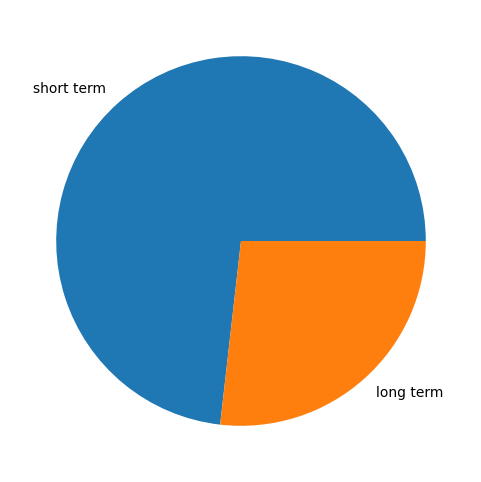

In [194]:
plt.figure(figsize=(6,6))
plt.pie( x = df['term'].value_counts(),labels=['short term', 'long term'])
plt.show()